In [1]:
from models import create_model



In [3]:
model = create_model('vit_lite')

In [4]:
print(model)

ViTLite(
  (tokenizer): Tokenizer(
    (conv_layers): Sequential(
      (0): Sequential(
        (0): Conv2d(3, 256, kernel_size=(4, 4), stride=(4, 4))
        (1): Identity()
        (2): Identity()
      )
    )
    (flattener): Flatten(start_dim=2, end_dim=3)
  )
  (classifier): Transformer(
    (dropout): Dropout(p=0.1, inplace=False)
    (blocks): ModuleList(
      (0): TransformerEncoder(
        (pre_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (self_attn): Attention(
          (qkv): Linear(in_features=256, out_features=768, bias=False)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=256, out_features=256, bias=True)
          (proj_drop): Dropout(p=0.1, inplace=False)
        )
        (linear1): Linear(in_features=256, out_features=512, bias=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (linear2): Linear(in_features=512, ou

In [7]:
model.classifier.blocks = model.classifier.blocks[:6]

In [8]:
print(model)

ViTLite(
  (tokenizer): Tokenizer(
    (conv_layers): Sequential(
      (0): Sequential(
        (0): Conv2d(3, 256, kernel_size=(4, 4), stride=(4, 4))
        (1): Identity()
        (2): Identity()
      )
    )
    (flattener): Flatten(start_dim=2, end_dim=3)
  )
  (classifier): Transformer(
    (dropout): Dropout(p=0.1, inplace=False)
    (blocks): ModuleList(
      (0): TransformerEncoder(
        (pre_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (self_attn): Attention(
          (qkv): Linear(in_features=256, out_features=768, bias=False)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=256, out_features=256, bias=True)
          (proj_drop): Dropout(p=0.1, inplace=False)
        )
        (linear1): Linear(in_features=256, out_features=512, bias=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (linear2): Linear(in_features=512, ou

In [10]:
import torch
model.load_state_dict(torch.load("../state_dicts/vit_lite_10.pt"))

RuntimeError: Error(s) in loading state_dict for ViTLite:
	Unexpected key(s) in state_dict: "classifier.blocks.6.pre_norm.weight", "classifier.blocks.6.pre_norm.bias", "classifier.blocks.6.self_attn.qkv.weight", "classifier.blocks.6.self_attn.proj.weight", "classifier.blocks.6.self_attn.proj.bias", "classifier.blocks.6.linear1.weight", "classifier.blocks.6.linear1.bias", "classifier.blocks.6.norm1.weight", "classifier.blocks.6.norm1.bias", "classifier.blocks.6.linear2.weight", "classifier.blocks.6.linear2.bias". 

In [32]:
import numpy as np
x = np.array([i for i in range(1,11)])

In [33]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [40]:
y = 2*x
z = x

In [41]:
y

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

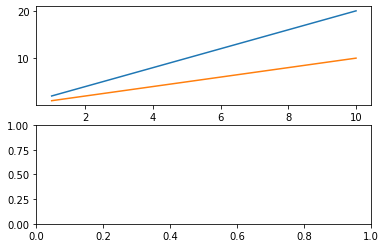

In [42]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,1)
z = x
axes[0].plot(x,y,x,z)

In [44]:
fig.savefig('./temp.png',dpi = fig.dpi)

In [10]:
y = [0.920000, 0.920000,0.911200,0.897500,0.870200,0.842500,0.798100,0.743200,0.689300,0.613400,0.550000,0.485600,0.409900,0.299800]
x = [i for i in range(1,15)]




In [11]:
y = y[::-1]
y



[0.2998,
 0.4099,
 0.4856,
 0.55,
 0.6134,
 0.6893,
 0.7432,
 0.7981,
 0.8425,
 0.8702,
 0.8975,
 0.9112,
 0.92,
 0.92]

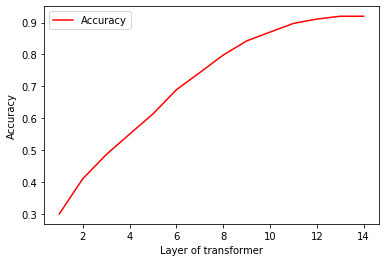

In [12]:
import matplotlib.pyplot as plt
plt.plot(x,y,'r-',label='Accuracy')
plt.xlabel('Layer of transformer')
plt.ylabel('Accuracy')
plt.legend()
